# IMDB Sentiment Analysis with RNN

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import datetime
import warnings
warnings.filterwarnings("ignore")
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

# Importing Dataset

In [3]:
imdb_data = pd.read_csv("/content/IMDB_Dataset.csv")
X = imdb_data["review"]
y = imdb_data["sentiment"]
X.shape

(50000,)

# Data Preprocessing

* Tokenization:
Tokenizer is created with a set vocabulary size (max_number_words) and filters to ignore specific characters.
Tokenizer is fitted on the text data (X) to generate a vocabulary and a word_index dictionary.
The count of unique tokens in the vocabulary is displayed.
* Convert Text to Sequences:
Text data (X) is transformed into sequences of integers using the texts_to_sequences method.
The sequences are then padded or truncated to a uniform length (max_len) using pad_sequences for consistent input size.
The resulting transformed data tensor (X) is displayed, showing its shape.
* Label Encoding:
The LabelEncoder class from sklearn.preprocessing is used.
An instance called encoder is created.
Categorical labels in variable y are transformed into numerical values using fit_transform

In [4]:
max_number_words = 25000
max_len = 250

In [5]:
# Tokenization
tokenizer=tf.keras.preprocessing.text.Tokenizer(num_words=max_number_words,filters="!@#$%^&*()<>{}[]''/?_+-=")
tokenizer.fit_on_texts(X)
word_index=tokenizer.word_index
print("No of Unique tokens",len(word_index))

# Convert text to sequences of integers
X = tokenizer.texts_to_sequences(X)
X = tf.keras.utils.pad_sequences(X, maxlen=max_len)
print('Shape of data tensor:', X.shape)

No of Unique tokens 235535
Shape of data tensor: (50000, 250)


In [6]:
# Label Encoding for the target variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Creating Training and Test Split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

print("Training X: \t", X_train.shape)
print("Training y: \t", y_train.shape)
print("Testing X: \t", X_test.shape)
print("Testing y: \t", y_test.shape)

Training X: 	 (40000, 250)
Training y: 	 (40000,)
Testing X: 	 (10000, 250)
Testing y: 	 (10000,)


# Builing the RNN

* The embedding layer converting the input text data into dense and meaningful vectors.
* The embedding layer transforms words into lower-dimensional representations, preserving semantic relationships and contextual information.stacking two LSTM layers. 
* The dropout layer augments regularization, preventing overfitting, while the stacked LSTMs deepen context understanding. 



In [8]:
model = tf.keras.Sequential()

In [9]:
## Layer 1 (Embedding Layer)
model.add(tf.keras.layers.Embedding(input_dim=max_number_words,output_dim=128,input_length=X.shape[1]))

In [10]:
## Layer 2 (Dropout)
model.add(tf.keras.layers.Dropout(0.2))

In [11]:
## Layer 3 (LSTM)
model.add(tf.keras.layers.LSTM(units=128,activation="tanh",return_sequences=True))

In [12]:
## Layer 4 (SpatialDropout1D)
model.add(tf.keras.layers.SpatialDropout1D(0.2))

In [13]:
## Layer 5 (LSTM)
model.add(tf.keras.layers.LSTM(units=64,activation="tanh"))

In [14]:
## Layer 6 (Dense)
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

## Compling the Model

In [15]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 128)          3200000   
                                                                 
 dropout (Dropout)           (None, 250, 128)          0         
                                                                 
 lstm (LSTM)                 (None, 250, 128)          131584    
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                        

# Training the RNN

In [17]:
earlyStopping =  tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_accuracy',restore_best_weights=True)

In [18]:
history = model.fit(X_train,y_train,epochs=6,batch_size=225,validation_split=0.4,callbacks=[earlyStopping])

Epoch 1/6
107/107 [==============================] - 345s 3s/step - loss: 0.6432 - accuracy: 0.6162 - val_loss: 0.5409 - val_accuracy: 0.7310
Epoch 2/6
107/107 [==============================] - 336s 3s/step - loss: 0.4310 - accuracy: 0.8059 - val_loss: 0.3701 - val_accuracy: 0.8400
Epoch 3/6
107/107 [==============================] - 340s 3s/step - loss: 0.3330 - accuracy: 0.8626 - val_loss: 0.3889 - val_accuracy: 0.8270
Epoch 4/6
107/107 [==============================] - 349s 3s/step - loss: 0.2863 - accuracy: 0.8870 - val_loss: 0.3246 - val_accuracy: 0.8699
Epoch 5/6
107/107 [==============================] - 337s 3s/step - loss: 0.2419 - accuracy: 0.9073 - val_loss: 0.3555 - val_accuracy: 0.8464
Epoch 6/6
107/107 [==============================] - 342s 3s/step - loss: 0.2183 - accuracy: 0.9188 - val_loss: 0.4776 - val_accuracy: 0.7813


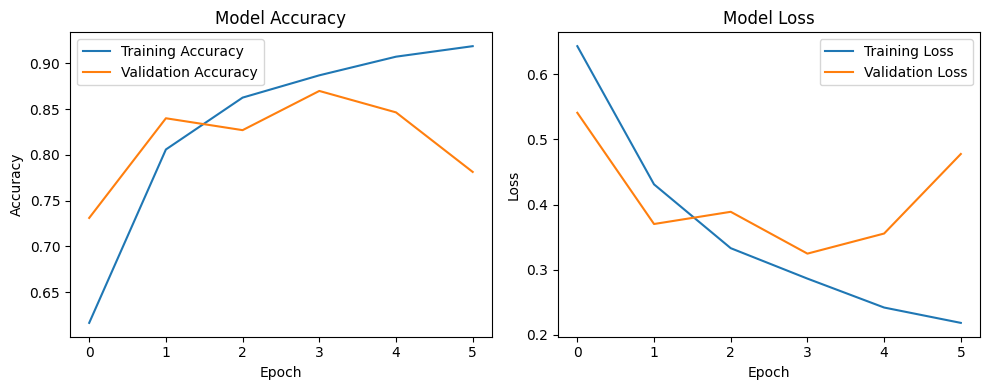

In [25]:
plt.figure(figsize=(10, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluating the Model

In [26]:
evals = model.evaluate(X_test, y_test)

313/313 [==============================] - 64s 203ms/step - loss: 0.4764 - accuracy: 0.7797


In [27]:
print("Test Loss:", evals[0])
print("Test Accuracy:", evals[1])

Test Loss: 0.476408988237381
Test Accuracy: 0.779699981212616


In [31]:
# Make predictions on the validation data
y_pred = model.predict(X_test) 
y_pred_classes = (y_pred > 0.5).astype(int) 
y_true = y_test  
from sklearn.metrics import classification_report

# Generate a classification report
class_names = ['Negative', 'Positive']
classification_rep = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Classification Report:\n", classification_rep)

313/313 [==============================] - 64s 203ms/step
Classification Report:
               precision    recall  f1-score   support

    Negative       0.95      0.59      0.73      4961
    Positive       0.70      0.97      0.82      5039

    accuracy                           0.78     10000
   macro avg       0.83      0.78      0.77     10000
weighted avg       0.83      0.78      0.77     10000

